# Coronary  Heart Disease  Prediction Using Machine Learning  Techniques

In [1]:
'''About the dataset:

The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,240 records and 15 attributes.

Attributes:

sex: male(1) or female(0);(Nominal)

age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

currentSmoker: whether or not the patient is a current smoker (Nominal)

cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

BPMeds: whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

prevalentHyp: whether or not the patient was hypertensive (Nominal)

diabetes: whether or not the patient had diabetes (Nominal)

totChol: total cholesterol level (Continuous)

sysBP: systolic blood pressure (Continuous)

diaBP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

glucose: glucose level (Continuous)

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) - Target Variable

Objective: Build a classification model that predicts heart disease in a subject. 
(note the target column to predict is 'TenYearCHD' where CHD = Coronary heart disease) '''
####################################################################
###################################################################
#Please do the following steps: 
#Read the file and display columns.
#Handle missing values, Outliers and Duplicate Data
#Calculate basic statistics of the data (count, mean, std, etc) and 
#exploratory analysts and describe your observations.
#Select columns that will be probably important to predict heart disease.
#If you remove columns explain why you removed those.
#Create training and testing sets (use 80% of the data for the training and
#reminder for testing).
#Build a machine learning model to predict TenYearCHD
#Evaluate the model (f1 score, Acuuracy, Precision ,Recall and Confusion Matrix)
#Conclude your findings (Model which is giving best f1 score and why)
print()

In [2]:
#  task   

#prepare a document  on heart disease    ----- 5 pages
                    # what is heart disease
                    # causes
                    # statistics of patients in world

# preapre a document on Machinelearning ---------10 pages
# dataset  parameter description 


          

# import  the packages 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load  the  dataset

In [4]:
###  load  the  dataset 
import pandas as pd
df=pd.read_csv("framingham.csv")
df  #### display  5 rows 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
# Displaying The First 5 Rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
# display last 5 rows
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [7]:
#display 5 samples randomly
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4179,0,54,1.0,0,0.0,0.0,0,0,0,207.0,137.5,89.0,25.43,63.0,72.0,0
1464,0,44,1.0,0,0.0,0.0,0,0,0,206.0,121.0,81.0,24.12,64.0,77.0,0
1627,0,46,2.0,0,0.0,0.0,0,0,0,244.0,107.5,70.0,22.72,47.0,88.0,0
2311,0,43,1.0,1,20.0,0.0,0,0,0,245.0,112.5,80.0,23.43,90.0,77.0,0
1636,1,44,4.0,0,0.0,0.0,0,0,0,211.0,130.0,85.5,26.98,60.0,82.0,0


# Display  the column names

In [8]:
###  display  the columns
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
##  first  15  columns are  input  and last column(TenYearCCHD) is output

# Display  total  rows and columns

In [10]:
df.shape

(4240, 16)

In [11]:
#  Education column as no relation with heart disease
df1=df.drop(columns=["education"])
df1.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
df1.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#  Draw  the corelation matrix

In [13]:
df1.corr()  ####  will display  the corelation matrix

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
currentSmoker,0.197026,-0.213662,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369
sysBP,-0.035879,0.394053,-0.130281,-0.088797,0.254194,0.057000,0.696656,0.111265,0.208734,1.000000,0.783952,0.326906,0.182155,0.140573,0.216374


In [14]:
df1.shape

(4240, 15)

#  Now  draw  the  heat map  

<AxesSubplot:>

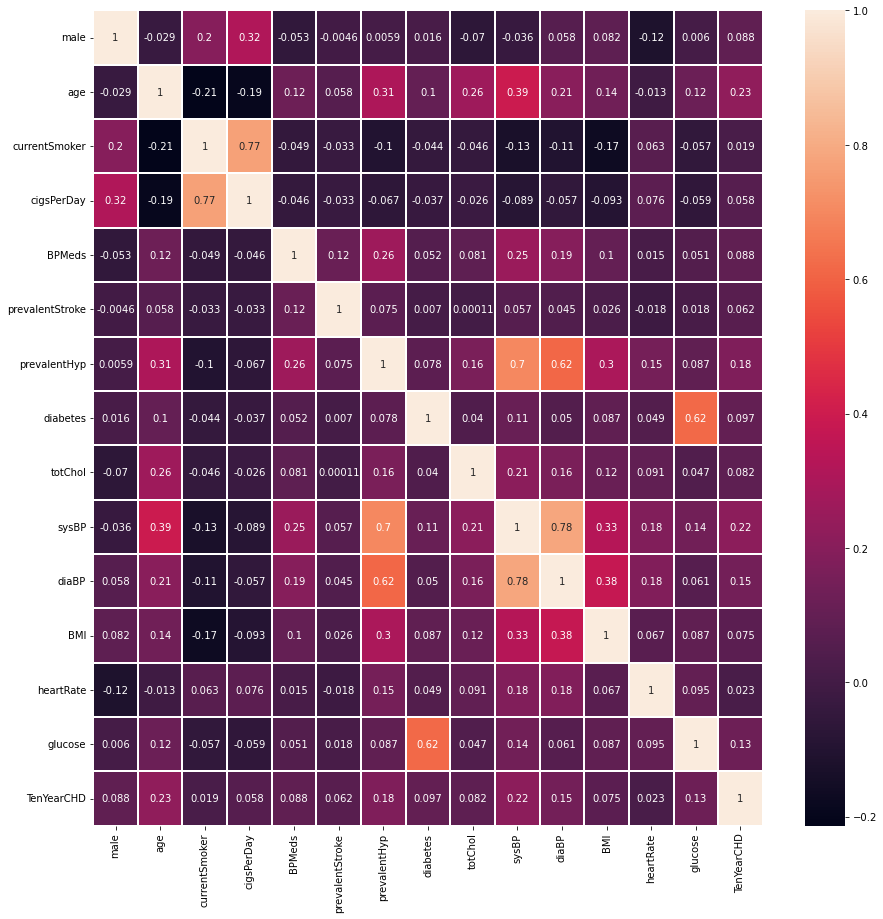

In [15]:
###  Now  draw  the  heat map  
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), annot=True, linewidths=0.1)

#  Draw   the  pair plot

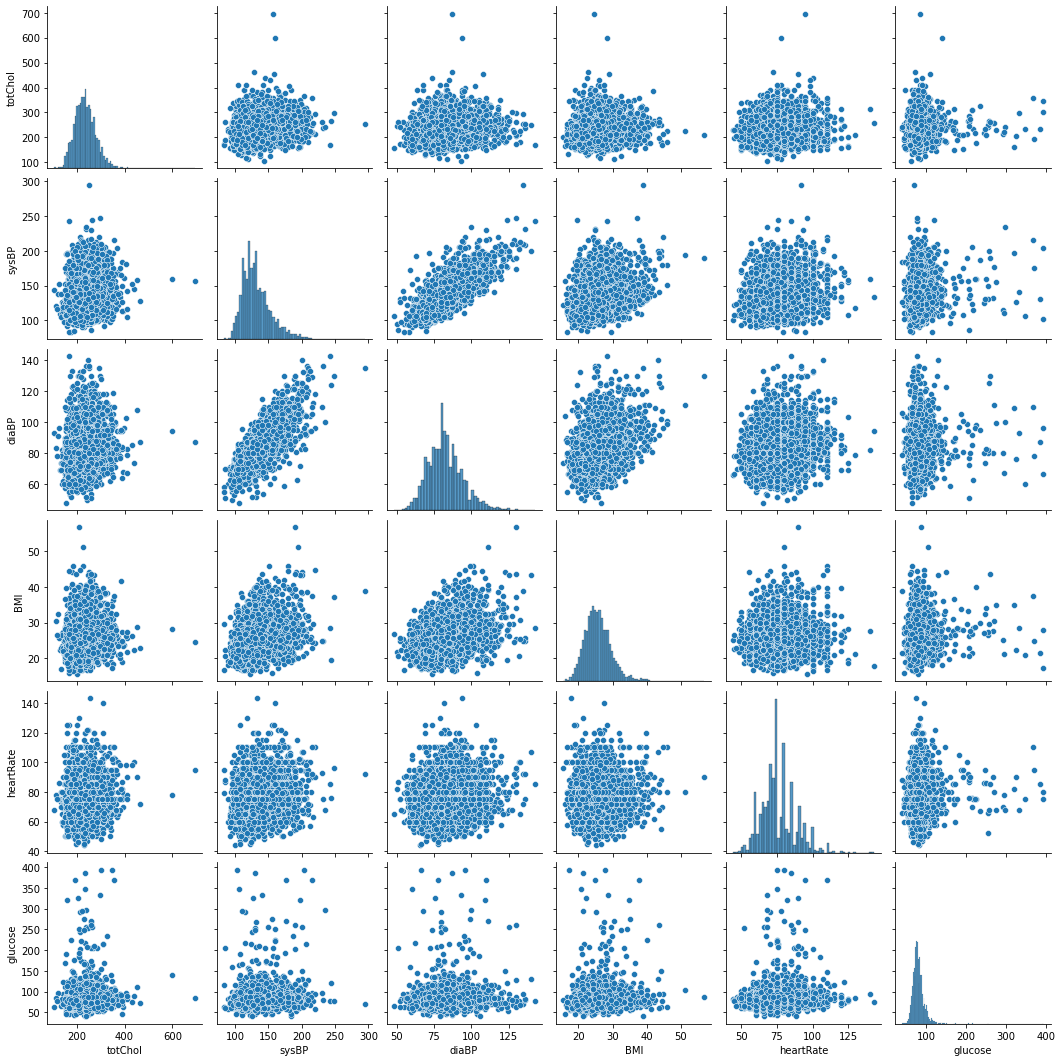

In [16]:
sns.pairplot(df1.loc[:,'totChol':'glucose'])

In [17]:
###  From  the  heat  map  and pair plot  it was found that
#sysBP and diaBP are highly correlated

# And currentSmoker and cigsPerDay are highly correlated

#  so drop  the features  which are high corelated  ##  we should take one 
#from each as they
##  are  highly corelated
features_to_drop = ['currentSmoker', 'diaBP']

df2=df1.drop(columns=features_to_drop)   #  df1.drop(features_to_drop,axis=1)
df2.sample(5)

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
2863,0,43,0.0,0.0,0,0,0,194.0,122.5,35.16,75.0,80.0,0
4170,0,41,5.0,0.0,0,0,0,205.0,105.0,20.85,87.0,NaN,0
633,0,56,5.0,0.0,0,0,0,266.0,134.5,30.78,79.0,84.0,0
648,0,39,20.0,0.0,0,0,0,160.0,128.5,20.56,60.0,83.0,0
3732,0,48,9.0,0.0,0,1,0,340.0,143.0,23.08,85.0,83.0,0


In [18]:
df2.shape

(4240, 13)

#  Lets  handle  the missing  values

In [19]:
## disply  the missig values  in   each column  
missing_value =df2.isnull().sum()
missing_value

male                 0
age                  0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [20]:
##  display the columns that have missing value
missing_value_count=missing_value[missing_value>0]
missing_value_count

cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [21]:
###  find  the missing  value  percentage  in each column
missing_value_percentage=(missing_value_count*100)/(df2.shape[0])
missing_value_percentage

cigsPerDay    0.683962
BPMeds        1.250000
totChol       1.179245
BMI           0.448113
heartRate     0.023585
glucose       9.150943
dtype: float64

In [22]:
## Find the maximum  missing value percentage
max(missing_value_percentage)

9.150943396226415

In [23]:
# we found that the maximum missing value percentage is 9.15 %.
# so we can use  imputation to fill the missing values

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df3 = pd.DataFrame(imputer.fit_transform(df2))
df3.columns = df2.columns
df3.index = df3.index
df3.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0.0
2,1.0,48.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0.0
3,0.0,61.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,28.58,65.0,103.0,1.0
4,0.0,46.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0.0


In [25]:
##  now cheack for missing values
df3.isnull().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [26]:
## we  can  see  now  there  is no missing values are present

In [27]:
df3.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0.0
2,1.0,48.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0.0
3,0.0,61.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,28.58,65.0,103.0,1.0
4,0.0,46.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0.0


#  Now  check for  outliers 

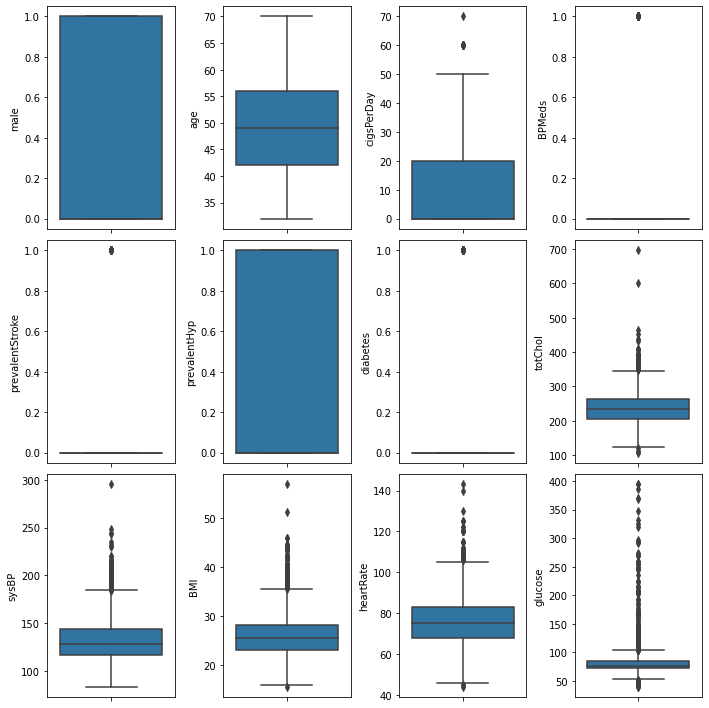

In [28]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in df3.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

In [29]:
# Outliers found in features named
#['totChol', 'sysBP', 'BMI','heartRate', 'glucose']
#  so we have to handle  the  outliers 

In [30]:
# Outliers handling

      
a= len(df3[df3['BMI'] > 43])
b=len(df3[df3['heartRate'] > 125])
c=len(df3[df3['glucose'] > 200])
d=len( df3[df3['totChol'] > 450])
e=len(df3[df3['sysBP'] > 220])
x=a+b+c+d+e
print('Number of training examples to be deleted for outliers removal is ',x)


Number of training examples to be deleted for outliers removal is  60


In [31]:
a,b,c,d,e

(12, 3, 34, 4, 7)

In [32]:
# deleting outliers

df3 = df3[~(df3['sysBP'] > 220)]
df3 = df3[~(df3['BMI'] > 43)]
df3 = df3[~(df3['heartRate'] > 125)]
df3 = df3[~(df3['glucose'] > 200)]
df3 = df3[~(df3['totChol'] > 450)]
print(df3.shape)

(4182, 13)


#  Lets find  if any duplicated  row  exists

In [33]:
duplicate = df3[df3.duplicated()] 
print(duplicate)

Empty DataFrame
Columns: [male, age, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, BMI, heartRate, glucose, TenYearCHD]
Index: []


In [34]:
##  it shows   no duplicate  data frame  exists

#  lets extract some useful insights 

In [35]:
# 1 Display how many people suffer from heart disease and not
df3['TenYearCHD'].value_counts()

0.0    3567
1.0     615
Name: TenYearCHD, dtype: int64

In [36]:
#  it means 615  people had heart disease problem

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

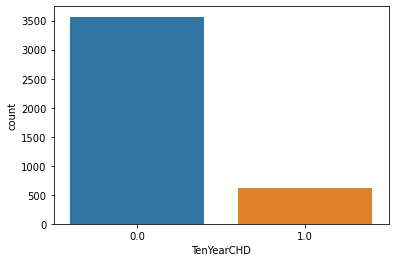

In [37]:
# 2 show the above information in a bar chart
import seaborn as sns
sns.countplot(df3['TenYearCHD'])

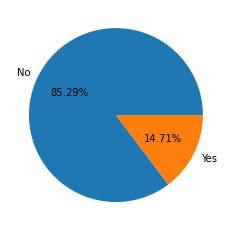

In [38]:
# 3 Show the percentage of pepple with and with out heart disease
plt.pie(df3['TenYearCHD'].value_counts(),labels=['No','Yes'],autopct="%0.2f%%" )
plt.show()

In [39]:
#4   Display no of male and female
df3['male'].value_counts()
# 0---female
#1 --male

0.0    2381
1.0    1801
Name: male, dtype: int64

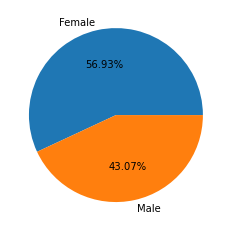

In [40]:
#5 show percentage of distribution of male and female
plt.pie(df3['male'].value_counts(),labels=['Female','Male'],autopct="%0.2f%%")
plt.show()

In [41]:
#  percentage of  Female is more than male  in our dataset

# 6 #  Display how many male have heart disease


In [42]:
df3.loc[(df3['male']==1)& (df3['TenYearCHD']==1)]

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
25,1.0,47.0,20.0,0.0,0.0,0.0,0.0,294.0,102.0,24.18,62.0,66.0,1.0
33,1.0,61.0,5.0,0.0,0.0,0.0,0.0,175.0,134.0,18.59,72.0,75.0,1.0
64,1.0,57.0,0.0,0.0,0.0,0.0,0.0,220.0,136.0,26.84,75.0,64.0,1.0
81,1.0,39.0,0.0,0.0,0.0,1.0,0.0,285.0,155.0,32.51,84.0,70.0,1.0
94,1.0,60.0,30.0,0.0,0.0,0.0,0.0,243.0,126.0,28.57,80.0,65.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,1.0,50.0,0.0,0.0,0.0,0.0,0.0,260.0,119.0,21.85,80.0,72.0,1.0
4223,1.0,56.0,0.0,1.0,0.0,1.0,0.0,287.0,149.0,21.68,90.0,75.0,1.0
4226,1.0,58.0,0.0,0.0,0.0,0.0,0.0,233.0,125.5,26.05,67.0,76.0,1.0
4232,1.0,68.0,0.0,0.0,0.0,1.0,0.0,176.0,168.0,23.14,60.0,79.0,1.0


In [43]:
len(df3.loc[(df3['male']==1)& (df3['TenYearCHD']==1)])

333

In [44]:
#  333  male have heart problem
# total male =1801
333/1801  

0.18489727928928373

In [45]:
#18.4 percentage of male  have heart problem

# 7 Display how many female have heart disease


In [46]:
df3.loc[(df3['male']==0)& (df3['TenYearCHD']==1)]

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
3,0.0,61.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,28.58,65.0,103.0,1.0
6,0.0,63.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,33.11,60.0,85.0,1.0
15,0.0,38.0,20.0,0.0,0.0,1.0,0.0,221.0,140.0,21.35,95.0,70.0,1.0
17,0.0,46.0,20.0,0.0,0.0,0.0,0.0,291.0,112.0,23.38,80.0,89.0,1.0
28,0.0,61.0,0.0,0.0,0.0,1.0,0.0,272.0,182.0,32.80,85.0,65.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4188,0.0,44.0,0.0,0.0,0.0,0.0,0.0,180.0,110.0,23.98,92.0,67.0,1.0
4193,0.0,63.0,0.0,0.0,0.0,1.0,0.0,306.0,195.0,27.96,75.0,87.0,1.0
4199,0.0,61.0,0.0,0.0,0.0,0.0,0.0,271.0,133.0,25.31,90.0,60.0,1.0
4207,0.0,61.0,0.0,0.0,0.0,0.0,0.0,261.0,124.0,23.06,55.0,83.0,1.0


In [47]:
len(df3.loc[(df3['male']==0)& (df3['TenYearCHD']==1)])

282

In [48]:
#  no of female with heart problem =282
# total no of female=2381

282/2381

0.11843763124737505

In [49]:
#  it means  11.8  %  of female  have heart problem

<AxesSubplot:xlabel='male', ylabel='count'>

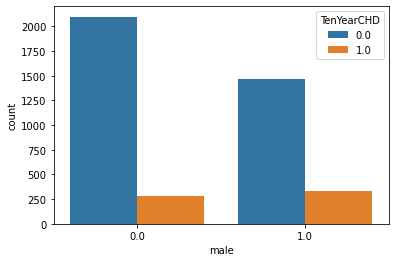

In [50]:
## male and female having disease or not
sns.countplot(df3['male'], hue=df3['TenYearCHD'])


# first bar is  for  female
# second bar is for  male

# 8 #  how many peploe  dont smoke  but suffered  from heart disease



In [51]:
len(df3.loc[(df3['cigsPerDay']==0)& (df3['TenYearCHD']==1)])

292

# 9 Display Ho many people with diabetes and heart disease

In [52]:

len(df3.loc[(df3['diabetes']==1)&(df3['TenYearCHD']==1)])

17

# 10 in which age range heart disease is more

In [53]:
# age between  20 to 40
len(df3.loc[(df3['TenYearCHD']==1)&(df3['age']. between (20,40))])

38

In [54]:
# age between 40 to 60
len(df3.loc[(df3['TenYearCHD']==1)&(df3['age']. between (40,60))])

435

In [55]:
# age between 60 to 80
len(df3.loc[(df3['TenYearCHD']==1)&(df3['age']. between (60,80))])

183

In [56]:
#  from abobe we conclude  that  most people from age between 40 to 60
#  suffer from heart disease

# Standardise some features

In [57]:
# Standardise some features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_standardise = ['age','totChol','sysBP','BMI', 'heartRate', 'glucose', 'cigsPerDay']
df3[cols_to_standardise] = scaler.fit_transform(df3[cols_to_standardise])
df3.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,-1.227590,-0.753969,0.0,0.0,0.0,0.0,-0.958484,-1.221506,0.322186,0.357459,-0.192334,0.0
1,0.0,-0.410239,-0.753969,0.0,0.0,0.0,0.0,0.316704,-0.512910,0.772315,1.620039,-0.263064,0.0
2,1.0,-0.176710,0.923077,0.0,0.0,0.0,0.0,0.200778,-0.205852,-0.094694,-0.063401,-0.687444,0.0
3,0.0,1.341227,1.761600,0.0,0.0,1.0,0.0,-0.262927,0.857042,0.733952,-0.905121,1.646646,1.0
4,0.0,-0.410239,1.174634,0.0,0.0,0.0,0.0,1.128188,-0.087753,-0.667585,0.778319,0.373506,0.0


#  Devide the data into  2 parts  one for input  and another for output

In [58]:
X=df3.drop(columns=["TenYearCHD"])
Y=df3.TenYearCHD

#  Now  split the data  into training and testing

In [59]:
#   80%  for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =\
train_test_split(X,Y, test_size=0.2, random_state=40)

In [60]:
print(X_train.shape)#(3345, 12)
print(X_test.shape)#(837, 12)
print(Y_train.shape)#(3345,)
print(Y_test.shape)#(837,)

(3345, 12)
(837, 12)
(3345,)
(837,)


# Create  a model   KNeighbors classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier(n_neighbors=7)
# train the model
K.fit(X_train,Y_train)
# test the model
Y_pred_knn=K.predict(X_test)

In [62]:
Y_pred_knn

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [63]:
Y_test.values

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1.

In [64]:
##  Find accuracy
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(Y_test,Y_pred_knn)
acc_knn=round(acc_knn*100,2)
print("Accuracy score in KNN is",acc_knn)

Accuracy score in KNN is 85.42


In [65]:
##  confusion  matrix
from sklearn.metrics  import  confusion_matrix
confusion_matrix(Y_test,Y_pred_knn)


array([[709,   9],
       [113,   6]], dtype=int64)

In [66]:
711/(713+117)

0.8566265060240964

In [67]:
# classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       718
         1.0       0.40      0.05      0.09       119

    accuracy                           0.85       837
   macro avg       0.63      0.52      0.51       837
weighted avg       0.80      0.85      0.80       837



# Apply  Decsion Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier(min_samples_split=50, random_state=5)
# train the model
D.fit(X_train,Y_train)
# test the model
Y_pred_dt=D.predict(X_test)
##  Find accuracy
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(Y_test,Y_pred_dt)
acc_dt=round(acc_dt*100,2)
print("Accuracy score in Decisiontree is",acc_dt)

Accuracy score in Decisiontree is 83.03


In [69]:
##  confusion  matrix
from sklearn.metrics  import  confusion_matrix
confusion_matrix(Y_test,Y_pred_dt)


array([[683,  35],
       [107,  12]], dtype=int64)

In [70]:
# classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91       718
         1.0       0.26      0.10      0.14       119

    accuracy                           0.83       837
   macro avg       0.56      0.53      0.53       837
weighted avg       0.78      0.83      0.80       837



# Apply  Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression(solver='liblinear')
# train the model
L.fit(X_train,Y_train)
# test the model
Y_pred_lg=L.predict(X_test)
##  Find accuracy
from sklearn.metrics import accuracy_score
acc_lg=accuracy_score(Y_test,Y_pred_lg)
acc_lg=round(acc_lg*100,2)
print("Accuracy score in LogisticRegression is",acc_lg)

Accuracy score in LogisticRegression is 86.26


In [72]:
##  confusion  matrix
from sklearn.metrics  import  confusion_matrix
confusion_matrix(Y_test,Y_pred_lg)


array([[718,   0],
       [115,   4]], dtype=int64)

In [73]:
knn
lg
nb
dt

NameError: name 'knn' is not defined

In [ ]:
# classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_lg))

#  Apply  naive bayes  algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
N=GaussianNB()
# train the model
N.fit(X_train,Y_train)
# test the model
Y_pred_nb=N.predict(X_test)
##  Find accuracy
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(Y_test,Y_pred_nb)
acc_nb=round(acc_nb*100,2)
print("Accuracy score in naive bayes is",acc_nb)

In [ ]:
##  confusion  matrix
from sklearn.metrics  import  confusion_matrix
confusion_matrix(Y_test,Y_pred_nb)

In [ ]:
# classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_nb))

# apply  support vector machine model

In [ ]:
from sklearn.svm import SVC
S=SVC(C=1,kernel='rbf')
# train the model
S.fit(X_train,Y_train)
# test the model
Y_pred_sv=S.predict(X_test)
##  Find accuracy
from sklearn.metrics import accuracy_score
acc_sv=accuracy_score(Y_test,Y_pred_sv)
acc_sv=round(acc_sv*100,2)
print("Accuracy score in support vector machine is",acc_sv)

In [ ]:
##  confusion  matrix
from sklearn.metrics  import  confusion_matrix
confusion_matrix(Y_test,Y_pred_sv)

In [ ]:
# classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_sv))

#  apply  Random Forest  Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
R=RandomForestClassifier(n_estimators=100,random_state=0)
# train the model
R.fit(X_train,Y_train)
# test the model
Y_pred_rf=R.predict(X_test)
##  Find accuracy
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(Y_test,Y_pred_rf)
acc_rf=round(acc_rf*100,2)
print("Accuracy score in random forest is",acc_rf)

In [ ]:
##  confusion  matrix
from sklearn.metrics  import  confusion_matrix
confusion_matrix(Y_test,Y_pred_sv)

In [ ]:
# classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_sv))

#  Now  compare  the  models

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
%matplotlib inline
models=["KNN","DT","LG","NB",'SVM','RF']
accuracy=[acc_knn,acc_dt,acc_lg,acc_nb,acc_sv,acc_rf]
plt.bar(models,accuracy,color=["green","red","yellow","blue"],edgecolor="black",linewidth=5,width=0.5)
plt.xlabel("MODELS",fontsize="20",color="red")
plt.ylabel("ACCURACY",fontsize=20,color="blue")
plt.grid(color="black",linestyle="--",linewidth=2)
plt.show()

#  CONCLUSION

In [ ]:
#  In the  above  project  we have  used  4 models .namely  knearest neighbors 
#,decision tree, # logistic regression and Naive bayes  ...
## in knn  accuracy is 85.42%  and f1 score is 0.92
## In decision tree accuracy is 83.03%  and f1 score is 0.91
## in logistic regression  accuracy is 86.26%  and f1 score is 0.93
## In naive bayes tree accuracy is 83.63%  and f1 score is 0.91
##  in support vector machine accuracy is 85.9% and f1 score is 0.92
## in random forest accuracy is 86.14 % and f1 score is 0.92
##  We  conclude  that  Logistic  Regression is best  suitable 
###for this dataset 

#  Recomended model for this project is Logistic Regression
